<a href="https://colab.research.google.com/github/GitAnnaV/IIS/blob/main/LAB_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Тема: Нечеткая логика, нечеткий вывод, алгоритм Мамдани

In [ ]:
!pip install scikit-fuzzy

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 920.8/920.8 kB 23.1 MB/s eta 0:00:00


In [ ]:
import numpy as np
import skfuzzy as fuz
from skfuzzy import control as ctrl

In [ ]:
# 1 -- Определяем входные и выходные переменные

# 0:Мокрая дорога, 100:Сухая дорогая 50:Среднее состояние
road_condition = ctrl.Antecedent(np.arange(0, 101, 1), "Дорожные условия")

# 0:Ночь, 100:День, 50:Сумерки
time_of_day = ctrl.Antecedent(np.arange(0, 101, 1), "Время суток")

# 0:Пустая дорогая, 100:Полная пробка, 50:Средняя загрузка
traffic = ctrl.Antecedent(np.arange(0, 101, 1), "Количество автомобилей")

# 0:Очень медленно, 100:Очень быстро, 50:Средняя скорость
speed_recommendation = ctrl.Consequent(np.arange(0, 101, 1), "Рекомендация по скорости")

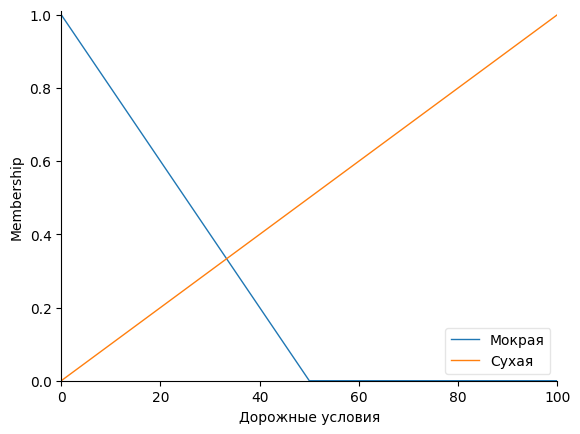

In [ ]:
# 2 -- Определение функций принадлежности для дорожных условий (треугольные функции)
# Фаззификация - преобразование чисел в "понятия"
road_condition['Мокрая'] = fuz.trimf(road_condition.universe, [0, 0, 50])
road_condition['Сухая'] = fuz.trimf(road_condition.universe, [0, 100, 100])
road_condition.view()

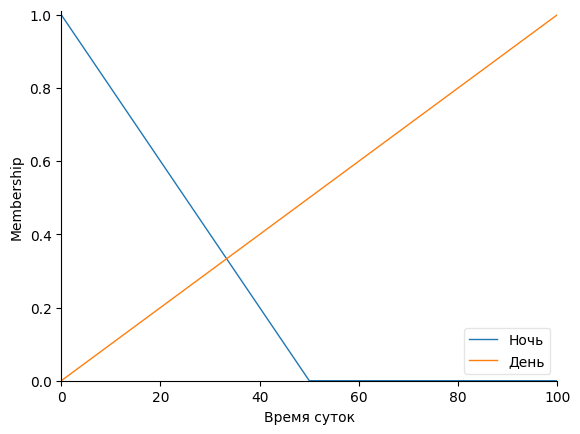

In [ ]:
# 3 -- Определение функций принадлежности для времени суток
time_of_day['Ночь'] = fuz.trimf(time_of_day.universe, [0, 0, 50])
time_of_day['День'] = fuz.trimf(time_of_day.universe, [0, 100, 100])
time_of_day.view()

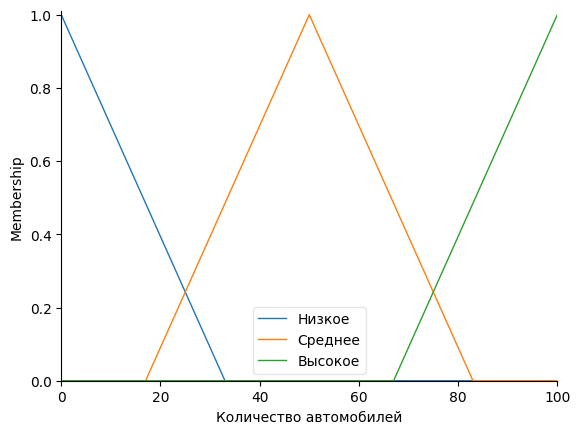

In [ ]:
# 4 -- Определение функций принадлежности для количества автомобилей
traffic['Низкое'] = fuz.trimf(traffic.universe, [0, 0, 33])
traffic['Среднее'] = fuz.trimf(traffic.universe, [17, 50, 83])
traffic['Высокое'] = fuz.trimf(traffic.universe, [67, 100, 100])
traffic.view()

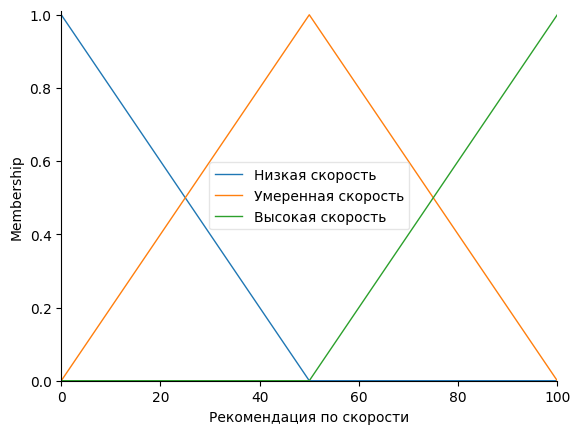

In [ ]:
# 5 -- Функции принадлежности для выходной переменной "Рекомендация по скорости"
speed_recommendation['Низкая скорость'] = fuz.trimf(speed_recommendation.universe, [0, 0, 50])
speed_recommendation['Умеренная скорость'] = fuz.trimf(speed_recommendation.universe, [0, 50, 100])
speed_recommendation['Высокая скорость'] = fuz.trimf(speed_recommendation.universe, [50, 100, 100])
speed_recommendation.view()

In [ ]:
# 6 -- Правила вывода рекомендации по скорости
# Составление нечетких правил
rule1 = ctrl.Rule(road_condition['Сухая'] & time_of_day['День'] & traffic['Низкое'], speed_recommendation['Высокая скорость'])
rule2 = ctrl.Rule(road_condition['Мокрая'] & time_of_day['День'] & traffic['Низкое'], speed_recommendation['Умеренная скорость'])
rule3 = ctrl.Rule(road_condition['Сухая'] & time_of_day['Ночь'] & traffic['Низкое'], speed_recommendation['Умеренная скорость'])
rule4 = ctrl.Rule(road_condition['Мокрая'] & time_of_day['Ночь'] & traffic['Низкое'], speed_recommendation['Низкая скорость'])
rule5 = ctrl.Rule(traffic['Среднее'], speed_recommendation['Умеренная скорость'])
rule6 = ctrl.Rule(traffic['Высокое'], speed_recommendation['Низкая скорость'])


In [ ]:
# 7 -- Система нечеткого управления на основе описанных правил
speed_ctrl = ctrl.ControlSystem([rule1, rule2, rule3, rule4, rule5, rule6])
speed_sim = ctrl.ControlSystemSimulation(speed_ctrl)

In [ ]:
# 8 -- Тестирование системы с различными входными значениями
test_cases = [
    (100, 100, 10),   # Сухая дорога, день, низкий трафик
    (20, 100, 10),    # Мокрая дорога, день, низкий трафик
    (100, 20, 10),    # Сухая дорога, ночь, низкий трафик
    (20, 20, 10),     # Мокрая дорога, ночь, низкий трафик
    (100, 100, 60),   # Сухая дорога, день, средний трафик
    (100, 100, 90)    # Сухая дорога, день, высокий трафик
]

for i, (road, time, traff) in enumerate(test_cases, 1):
    speed_sim.input['Дорожные условия'] = road
    speed_sim.input['Время суток'] = time
    speed_sim.input['Количество автомобилей'] = traff

    speed_sim.compute()
    # Выполнение нечеткого вывода:
    # - Агрегация активированных выходных функций всех правил
    # - Дефаззификация агрегированного результата в четкое значение

    print(f"Тест {i}:")
    print(f"Дорожные условия: {road}% (100 = сухая, 0 = мокрая)")
    print(f"Время суток: {time}% (100 = день, 0 = ночь)")
    print(f"Трафик: {traff}%")
    print(f"Рекомендуемая скорость: {speed_sim.output['Рекомендация по скорости']:.2f}%")
    print()

Тест 1:
  Дорожные условия: 100% (100 = сухая, 0 = мокрая)
  Время суток: 100% (100 = день, 0 = ночь)
  Трафик: 10%
  Рекомендуемая скорость: 82.16%

Тест 2:
  Дорожные условия: 20% (100 = сухая, 0 = мокрая)
  Время суток: 100% (100 = день, 0 = ночь)
  Трафик: 10%
  Рекомендуемая скорость: 51.09%

Тест 3:
  Дорожные условия: 100% (100 = сухая, 0 = мокрая)
  Время суток: 20% (100 = день, 0 = ночь)
  Трафик: 10%
  Рекомендуемая скорость: 51.09%

Тест 4:
  Дорожные условия: 20% (100 = сухая, 0 = мокрая)
  Время суток: 20% (100 = день, 0 = ночь)
  Трафик: 10%
  Рекомендуемая скорость: 37.08%

Тест 5:
  Дорожные условия: 100% (100 = сухая, 0 = мокрая)
  Время суток: 100% (100 = день, 0 = ночь)
  Трафик: 60%
  Рекомендуемая скорость: 50.00%

Тест 6:
  Дорожные условия: 100% (100 = сухая, 0 = мокрая)
  Время суток: 100% (100 = день, 0 = ночь)
  Трафик: 90%
  Рекомендуемая скорость: 17.84%



ДЕМОНСТРАЦИЯ РАБОТЫ СИСТЕМЫ:
Рекомендация по скорости: 49.68%


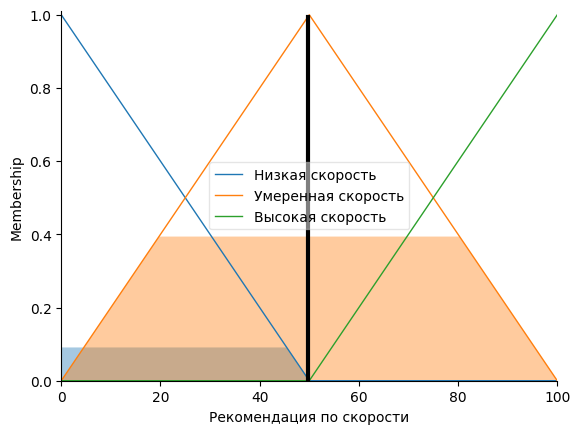

In [ ]:
# 9 -- Демонстрация работы с конкретными значениями
speed_sim.input['Дорожные условия'] = 80  # В основном сухая дорога
speed_sim.input['Время суток'] = 30       # Ближе к ночи
speed_sim.input['Количество автомобилей'] = 70  # Средне-высокий трафик

speed_sim.compute()

print(f"Рекомендация по скорости: {speed_sim.output['Рекомендация по скорости']:.2f}%")

# Визуализация результата
speed_recommendation.view(sim=speed_sim)